<a href="https://colab.research.google.com/github/KilluaZ01/BrickSync/blob/main/PandasAdvanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('air_quality_long.csv', parse_dates= True, index_col = 'date.utc')
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
df = pd.read_csv('air_quality_long.csv', index_col = 'date.utc')
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>


In [ ]:
df.sort_values(by = ['city'])

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-05-19 13:00:00+00:00,Antwerpen,BE,BETR801,no2,14.5,µg/m³
2019-05-19 14:00:00+00:00,Antwerpen,BE,BETR801,no2,23.0,µg/m³
2019-05-19 15:00:00+00:00,Antwerpen,BE,BETR801,no2,33.0,µg/m³
2019-05-19 16:00:00+00:00,Antwerpen,BE,BETR801,no2,17.5,µg/m³
...,...,...,...,...,...,...
2019-04-27 10:00:00+00:00,Paris,FR,FR04014,no2,10.9,µg/m³
2019-04-27 09:00:00+00:00,Paris,FR,FR04014,no2,11.9,µg/m³
2019-04-27 08:00:00+00:00,Paris,FR,FR04014,no2,14.5,µg/m³


In [ ]:
# Long to Wide Format - Pivoting

no2 = df[df['parameter'] == 'no2']
no2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [ ]:
no2_subset = no2.sort_index().groupby(['location']).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


<Axes: xlabel='date.utc'>

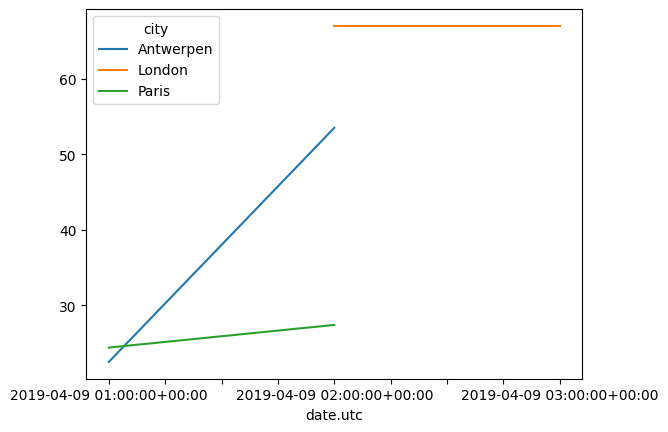

In [ ]:
no2_subset.pivot(columns = "city", values = "value").plot()

<Axes: xlabel='date.utc'>

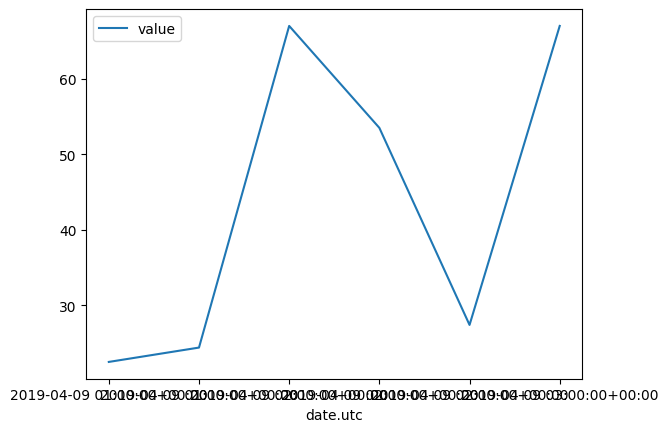

In [ ]:
no2_subset.plot()

<Axes: xlabel='date.utc'>

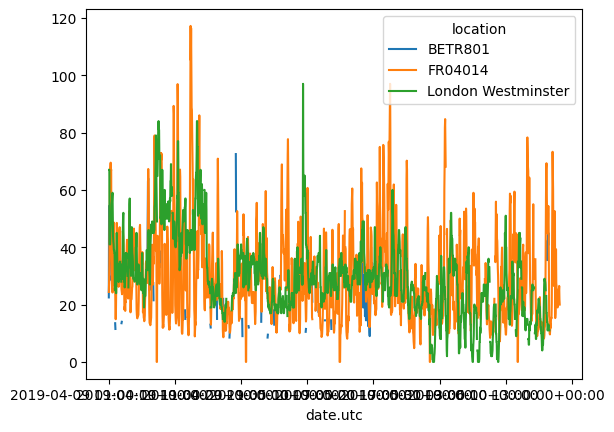

In [ ]:
no2.pivot(columns = "location", values = 'value').plot()

In [ ]:
no2_subset.pivot_table(values = "value", index = "date.utc", columns = "location", aggfunc = "mean")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0
